#Shipping Cost Analysis

##1. Introduction
#### Shipping is an essential part of any business that sells physical products to customers. However, shipping can also be a significant source of costs and inefficiencies, especially in a globalized and competitive market. Therefore, it is important to conduct a shipping analysis of costs.

##2. Scope
#### Which countries have the highest shipping costs?
####How does their shipping costs compare to the product actual price?
####How they compare to the countries that buy the most in shipping cost?

##3. Predictions
####They are rural countries.
####They don't buy in large quantities and prices.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Global_Superstore2.xlsx')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

##4. The most expensive countries to ship to

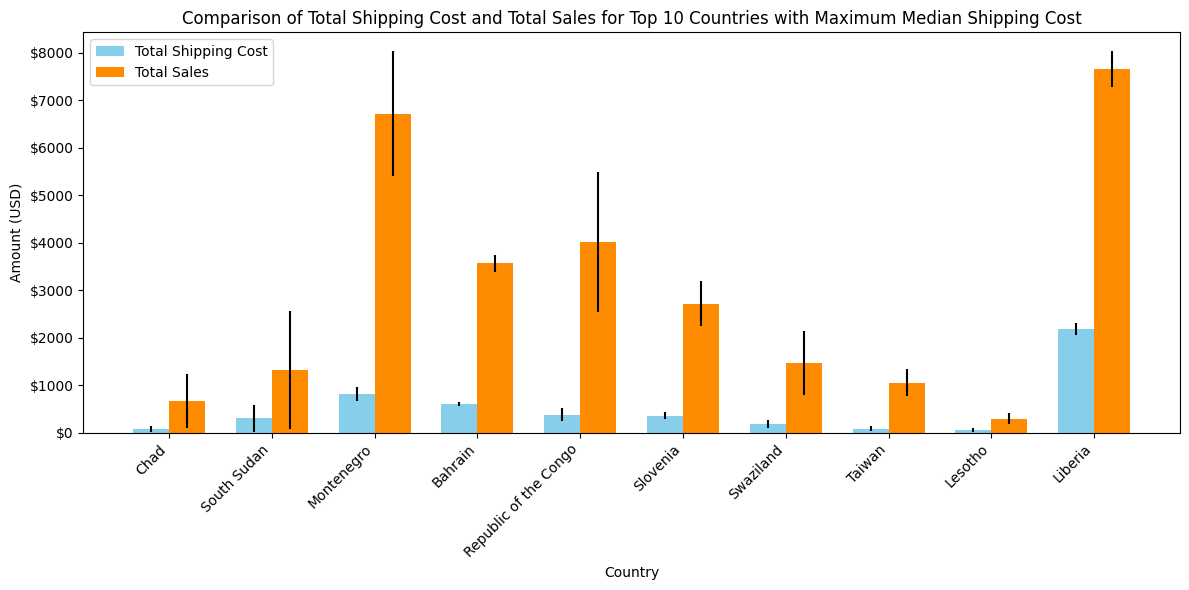

                 Country  Median Shipping Cost  Total Shipping Cost  \
0                   Chad               148.970                72.76   
1            South Sudan                40.855               297.94   
2             Montenegro                39.840               813.90   
3                Bahrain                36.380               594.89   
4  Republic of the Congo                29.515               375.75   
5               Slovenia                28.160               355.82   
6              Swaziland                26.540               183.66   
7                 Taiwan                21.605                81.71   
8                Lesotho                21.310                53.08   
9                Liberia                19.480              2179.25   

   Total Sales  SEM Shipping Cost   SEM Sales  
0       669.18          29.530000  290.430000  
1      1317.03         147.110000  630.285000  
2      6711.99          76.203507  669.255145  
3      3560.88          19

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by country and calculate the median and total shipping cost
country_median_shipping_cost = df.groupby('Country')['Shipping Cost'].median()

# Step 2: Select the top 10 countries with the highest median shipping costs
top_10_countries_shipping_cost = country_median_shipping_cost.nlargest(10)

# Step 3: Get data for all countries within top_10_countries_shipping_cost
data_for_top_10_countries_shipping_cost = df[df['Country'].isin(top_10_countries_shipping_cost.index)]

# Step 4: Calculate total shipping cost and total sales for each of the top 10 countries
total_shipping_cost_for_top_10_countries = data_for_top_10_countries_shipping_cost.groupby('Country')['Shipping Cost'].sum()
total_sales_for_top_10_countries = data_for_top_10_countries_shipping_cost.groupby('Country')['Sales'].sum()

# Calculate standard error of the mean for shipping cost and sales
sem_shipping_cost = data_for_top_10_countries_shipping_cost.groupby('Country')['Shipping Cost'].sem()
sem_sales = data_for_top_10_countries_shipping_cost.groupby('Country')['Sales'].sem()

# Step 5: Plot the results using grouped bar plot
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(top_10_countries_shipping_cost))

plt.bar(index, total_shipping_cost_for_top_10_countries, width=bar_width, yerr=1.96*sem_shipping_cost, label='Total Shipping Cost', color='skyblue')
plt.bar([i + bar_width for i in index], total_sales_for_top_10_countries, width=bar_width, yerr=1.96*sem_sales, label='Total Sales', color='darkorange')

plt.title('Comparison of Total Shipping Cost and Total Sales for Top 10 Countries with Maximum Median Shipping Cost')
plt.xlabel('Country')
plt.ylabel('Amount (USD)')
plt.legend()

plt.xticks([i + bar_width/2 for i in index], top_10_countries_shipping_cost.index, rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter('${:.0f}'.format)
plt.tight_layout()

# Display the plot
plt.show()

# Create DataFrame for the table
table_data = {
    'Country': top_10_countries_shipping_cost.index,
    'Median Shipping Cost': top_10_countries_shipping_cost.values,
    'Total Shipping Cost': total_shipping_cost_for_top_10_countries.values,
    'Total Sales': total_sales_for_top_10_countries.values,
    'SEM Shipping Cost': sem_shipping_cost.values,
    'SEM Sales': sem_sales.values
}
#SEM stands for Standard Error of the Mean.
# Create DataFrame
table_df = pd.DataFrame(table_data)

# Display the table
print(table_df)

##5. Quantity of items

In [ ]:
import pandas as pd

# Step 1: Filter data to include only the top 10 countries from the previous plot
top_10_countries_list = top_10_countries_shipping_cost.index

# Filtered data for the top 10 countries
data_top_10_countries = df[df['Country'].isin(top_10_countries_list)]

# Step 2: Group the filtered data by country and calculate the sum of quantities
quantity_by_country = data_top_10_countries.groupby('Country')['Quantity'].sum()

# Step 3: Calculate the standard error of the mean for quantity
sem_quantity = data_top_10_countries.groupby('Country')['Quantity'].sem()

# Step 4: Create a DataFrame to display quantity bought by each country with error bars representing 95% confidence interval
data = {
    'Country': quantity_by_country.index,
    'Quantity': quantity_by_country.values,
    'Standard Error': sem_quantity.values
}

# Create DataFrame
quantity_table = pd.DataFrame(data)

# Display the table
print(quantity_table)


                 Country  Quantity  Standard Error
0                Bahrain         6        1.000000
1                   Chad        11        4.500000
2                Lesotho        23        1.740051
3                Liberia        37        0.646357
4             Montenegro        13        1.108678
5  Republic of the Congo        30        2.097618
6               Slovenia        20        2.905933
7            South Sudan         5        1.500000
8              Swaziland         5        1.500000
9                 Taiwan        52        0.596957


##6. What's the percentage of the shipping price in the final price for each country

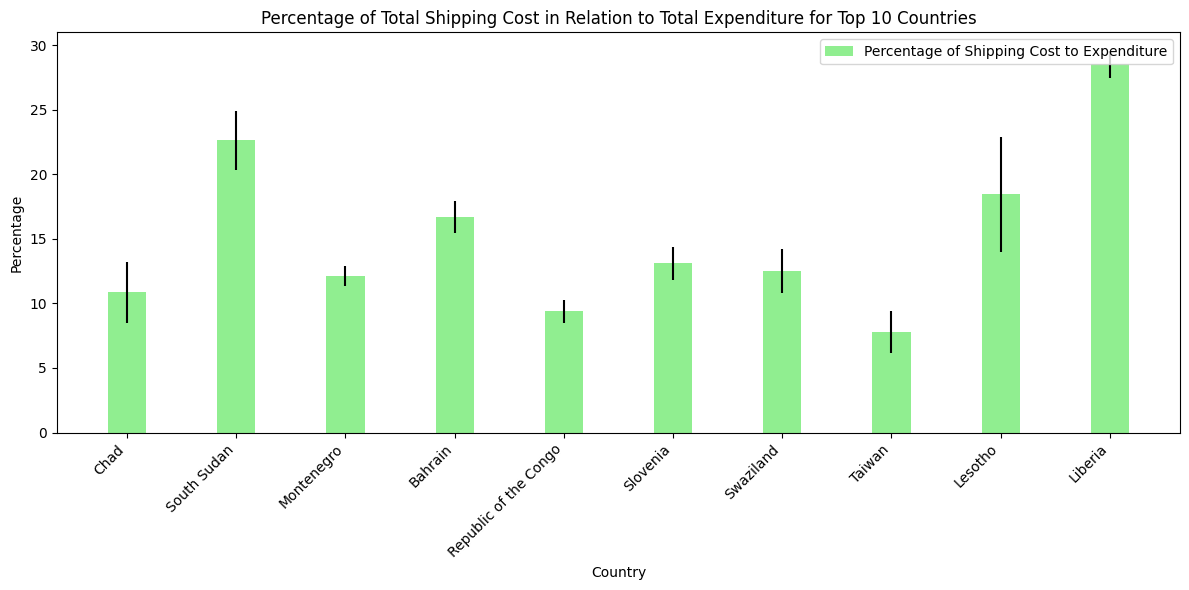

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Group by country and calculate the median and total shipping cost
country_median_shipping_cost = df.groupby('Country')['Shipping Cost'].median()

# Step 2: Select the top 10 countries with the highest median shipping costs
top_10_countries = country_median_shipping_cost.nlargest(10)

# Step 3: Get data for all countries within top_10_countries
data_for_top_10_countries = df[df['Country'].isin(top_10_countries.index)]

# Step 4: Calculate total shipping cost and total expenditure for each of the top 10 countries
total_shipping_cost_for_top_10 = data_for_top_10_countries.groupby('Country')['Shipping Cost'].sum()
total_expenditure_for_top_10 = data_for_top_10_countries.groupby('Country')['Sales'].sum()

# Step 5: Calculate the percentage for each country
percentage_for_top_10 = (total_shipping_cost_for_top_10 / total_expenditure_for_top_10) * 100

# Calculate standard error of the mean for the percentage values
sem_percentage = (percentage_for_top_10 * (100 - percentage_for_top_10) / total_expenditure_for_top_10).apply(np.sqrt)

# Calculate margin of error (95% confidence interval)
margin_of_error = 1.96 * sem_percentage

# Step 6: Plot the results using a bar plot
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(top_10_countries))

plt.bar(index, percentage_for_top_10, width=bar_width, color='lightgreen', label='Percentage of Shipping Cost to Expenditure', yerr=margin_of_error)

plt.title('Percentage of Total Shipping Cost in Relation to Total Expenditure for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(index, top_10_countries.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

##7. Top 10 countries that sell the most





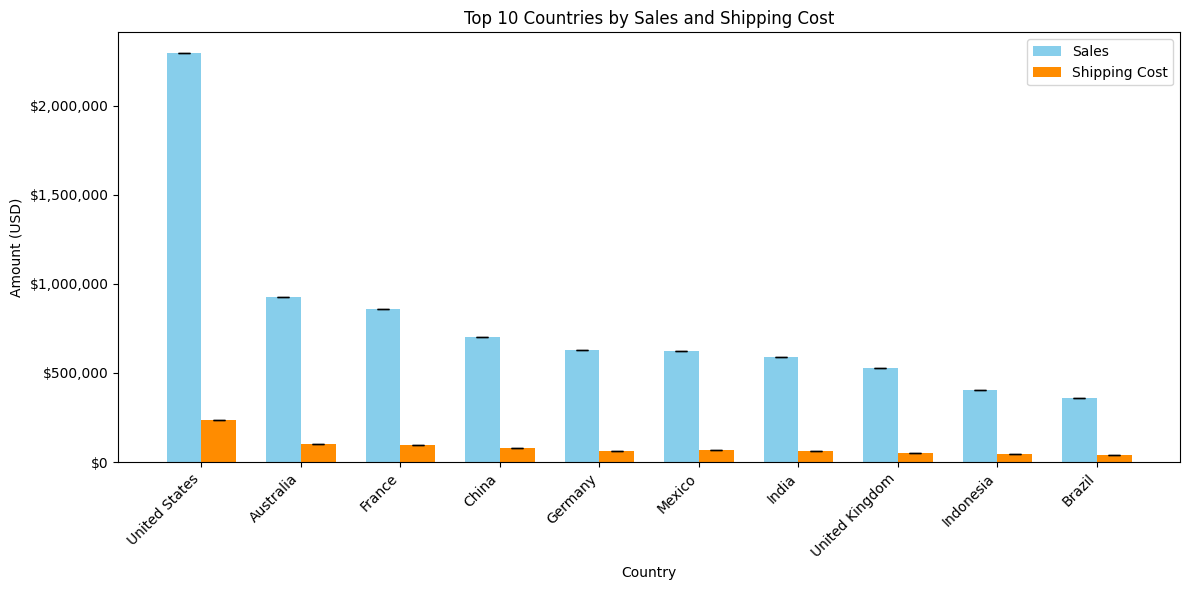

In [ ]:
# Assuming your DataFrame is named 'df'
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Grouping data by country and calculating the sum of sales and shipping cost
country_sales = df.groupby('Country')['Sales'].sum()
country_shipping_cost = df.groupby('Country')['Shipping Cost'].sum()

# Sorting countries by sales in descending order
sorted_country_sales = country_sales.sort_values(ascending=False)
sorted_country_shipping_cost = country_shipping_cost.reindex(sorted_country_sales.index)

# Selecting top 10 countries
top_10_countries_sales = sorted_country_sales.head(10)
top_10_countries_shipping_cost = sorted_country_shipping_cost.head(10)

# Calculating the standard error of the mean for each group
top_10_countries_sales_sem = df[df['Country'].isin(top_10_countries_sales.index)].groupby('Country')['Sales'].sem()
top_10_countries_shipping_cost_sem = df[df['Country'].isin(top_10_countries_shipping_cost.index)].groupby('Country')['Shipping Cost'].sem()

# Multiplying the standard error by 1.96 to get the 95% confidence interval
top_10_countries_sales_ci = top_10_countries_sales_sem * 1.96
top_10_countries_shipping_cost_ci = top_10_countries_shipping_cost_sem * 1.96

# Plotting the sum of sales and shipping cost for the top 10 countries with error bars
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(top_10_countries_sales))

plt.bar(index, top_10_countries_sales, width=bar_width, label='Sales', color='skyblue', yerr=top_10_countries_sales_ci, capsize=4)
plt.bar([i + bar_width for i in index], top_10_countries_shipping_cost, width=bar_width, label='Shipping Cost', color='darkorange', yerr=top_10_countries_shipping_cost_ci, capsize=4)

# Formatting y-axis ticks as dollars
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Top 10 Countries by Sales and Shipping Cost')
plt.xlabel('Country')
plt.ylabel('Amount (USD)')
plt.xticks([i + bar_width/2 for i in index], top_10_countries_sales.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


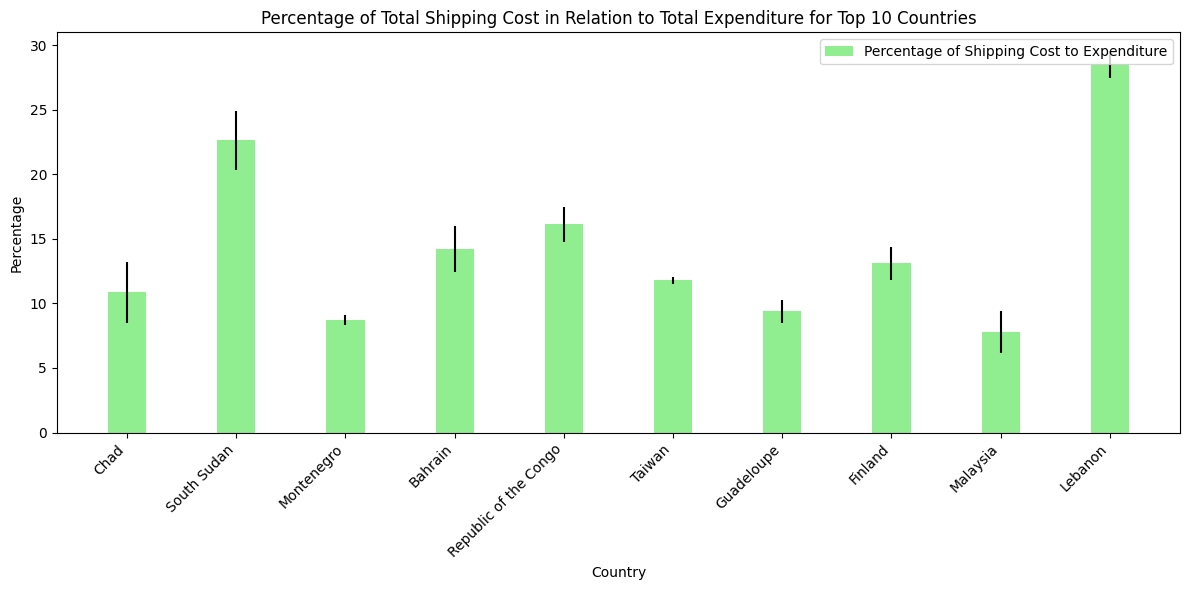

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Group by country and calculate the median and total sales
country_median_sales = df.groupby('Country')['Sales'].median()

# Step 2: Select the top 10 countries with the highest median sales
top_10_countries = country_median_sales.nlargest(10)

# Step 3: Get data for all countries within top_10_countries
data_for_top_10_countries = df[df['Country'].isin(top_10_countries.index)]

# Step 4: Calculate total shipping cost and total expenditure for each of the top 10 countries
total_shipping_cost_for_top_10 = data_for_top_10_countries.groupby('Country')['Shipping Cost'].sum()
total_expenditure_for_top_10 = data_for_top_10_countries.groupby('Country')['Sales'].sum()

# Step 5: Calculate the percentage for each country
percentage_for_top_10 = (total_shipping_cost_for_top_10 / total_expenditure_for_top_10) * 100

# Calculate standard error of the mean for the percentage values
sem_percentage = (percentage_for_top_10 * (100 - percentage_for_top_10) / total_expenditure_for_top_10).apply(np.sqrt)

# Calculate margin of error (95% confidence interval)
margin_of_error = 1.96 * sem_percentage

# Step 6: Plot the results using a bar plot
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(top_10_countries))

plt.bar(index, percentage_for_top_10, width=bar_width, color='lightgreen', label='Percentage of Shipping Cost to Expenditure', yerr=margin_of_error)

plt.title('Percentage of Total Shipping Cost in Relation to Total Expenditure for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(index, top_10_countries.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Grouping data by country and calculating the sum of quantity
country_quantity = df.groupby('Country')['Quantity'].sum()

# Sorting countries by quantity in descending order
sorted_country_quantity = country_quantity.sort_values(ascending=False)

# Selecting top 10 countries
top_10_countries_quantity = sorted_country_quantity.head(10)

# Calculating the standard error of the mean for each country
country_quantity_sem = df[df['Country'].isin(top_10_countries_quantity.index)].groupby('Country')['Quantity'].sem()

# Choosing a 95% confidence level and finding the corresponding z-score
confidence_level = 0.95
z_score = 1.96  # from standard normal distribution table

# Multiplying the standard error by the z-score to get the 95% confidence interval
country_quantity_ci = country_quantity_sem * z_score

# Creating a DataFrame for the top 10 countries with quantity and confidence interval
result_df = pd.DataFrame({
    'Country': top_10_countries_quantity.index,
    'Quantity': top_10_countries_quantity.values,
    'Confidence Interval': country_quantity_ci.values
})

# Displaying the DataFrame
print(result_df)

          Country  Quantity  Confidence Interval
0   United States     37873             0.084647
1          France     10804             0.110064
2       Australia     10673             0.100570
3          Mexico     10011             0.083207
4         Germany      7745             0.094579
5           China      7081             0.108863
6  United Kingdom      6161             0.116199
7          Brazil      6148             0.084629
8           India      5758             0.105631
9       Indonesia      5237             0.043625


##8. Comparação

In [ ]:
import pandas as pd

# Data
data = {
    'Dataset': ['First Set', 'Second Set'],
    'Mean Shipping Cost': [mean_shipping_cost_for_first_set, mean_shipping_cost_for_second_set],
    'Max Shipping Cost': [max_shipping_cost_for_first_set, max_shipping_cost_for_second_set],
    'Min Shipping Cost': [min_shipping_cost_for_first_set, min_shipping_cost_for_second_set],
    'Std Dev Shipping Cost': [std_shipping_cost_for_first_set, std_shipping_cost_for_second_set]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set index
df.set_index('Dataset', inplace=True)

# Display the table
print(df)


            Mean Shipping Cost  Max Shipping Cost  Min Shipping Cost  \
Dataset                                                                
First Set            79.817588         155.660714          26.540000   
Second Set           31.954333          41.998415          23.831678   

            Std Dev Shipping Cost  
Dataset                            
First Set               49.970730  
Second Set               6.234881  


##9. Conclusion

The data shows that the first set of countries has a much higher mean shipping cost than the second set of countries: $79.82 versus $31.95. This means that, on average, the customers in the first set of countries pay more than twice as much as the customers in the second set of countries for shipping.

The data also shows that the first set of countries has a much higher variation in shipping costs than the second set of countries: the standard deviation of shipping cost for the first set of countries is $49.97, while it is only $6.23 for the second set of countries. This means that the shipping costs in the first set of countries are more spread out and less predictable than the shipping costs in the second set of countries.

Moreover, the maximum shipping cost for the first set of countries is $155.66,
which is almost four times as much as the maximum shipping cost for the second set of countries: $42.00. This means that some customers in the first set of countries face extremely high shipping costs compared to the customers in the second set of countries.

The minimum shipping cost for the first set of countries is $26.54, which is slightly higher than the minimum shipping cost for the second set of countries: $23.83. This means that even the lowest shipping cost in the first set of countries is not much lower than the average shipping cost in the second set of countries.

These differences in shipping costs could affect the volume and frequency of purchases, as well as the customer satisfaction and loyalty, in the two sets of countries.